In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# définition les noms des colonnes
colonnes = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [3]:
# Ouverture du fichier
data_full = pd.read_csv("./data/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1', header=None, names=colonnes)

In [4]:
# A REFAIRE DANS UN NOTEBOOK SEPARE SUR XPS
# import pandas as pd
# import gensim
# from gensim import corpora
# from gensim.models import CoherenceModel
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer, SnowballStemmer
# import nltk
# import re

# # Télécharger les ressources nécessaires de NLTK
# nltk.download('stopwords')
# nltk.download('wordnet')

# # Charger les données

# texts = data_full['text'].values

# # Prétraitement des données
# stop_words = set(stopwords.words('english'))
# stemmer = SnowballStemmer('english')

# def preprocess(text):
#     result = []
#     for token in gensim.utils.simple_preprocess(text):
#         if token not in stop_words and len(token) > 3:
#             result.append(stemmer.stem(WordNetLemmatizer().lemmatize(token, pos='v')))
#     return result

# processed_texts = [preprocess(text) for text in texts]

# # Créer un dictionnaire et un corpus
# dictionary = corpora.Dictionary(processed_texts)
# corpus = [dictionary.doc2bow(text) for text in processed_texts]

# # Déterminer le nombre optimal de topics
# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         model = gensim.models.LdaModel(corpus=corpus,
#                                        id2word=dictionary,
#                                        num_topics=num_topics,
#                                        random_state=100,
#                                        update_every=1,
#                                        chunksize=100,
#                                        passes=10,
#                                        alpha='auto',
#                                        per_word_topics=True)
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())
#     return model_list, coherence_values

# model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_texts, start=2, limit=40, step=6)

# # Sélectionner le modèle avec la meilleure cohérence
# optimal_model = model_list[coherence_values.index(max(coherence_values))]

# # Afficher les topics
# topics = optimal_model.print_topics(num_words=10)
# for topic in topics:
#     print(topic)

# # Détecter le topic traitant des voyages en avion
# def find_air_travel_topic(model, dictionary):
#     for idx, topic in model.print_topics(-1):
#         if 'flight' in topic or 'airline' in topic or 'airport' in topic:
#             print(f"Topic {idx}: {topic}")

# find_air_travel_topic(optimal_model, dictionary)


In [5]:
import pandas as pd
import re

# Liste de mots-clés spécifiques au domaine de l'aviation
# Liste améliorée de mots-clés spécifiques au domaine de l'aviation
keywords = [
    'flight', 'airline', 'plane', 'airport', 'boarding', 'delay', 'baggage', 
    'crew', 'steward', 'check-in', 'boarding pass', 'gate', 'luggage', 'landed'
    'overbooked', 'turbulence', 'landing', 'takeoff', 'in-flight', 'cabin crew', 
    'air hostess', 'air steward', 'seatbelt', 'emergency exit', 'runway', 
    'air traffic control', 'lost baggage', 'missed connection', 'upgrade', 
    'frequent flyer', 'mileage', 'layover', 'diverted', 'grounded'
]

# Construire une expression régulière pour correspondre uniquement aux mots entiers
pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

# Filtrer les tweets contenant les mots-clés
data_filtered = data_full[data_full['text'].str.contains(pattern, case=False, na=False, regex=True)]

# Exclure les tweets contenant des mots indésirables
exclude_pattern = r'\b(?:screwed|screw)\b'
data_filtered = data_filtered[~data_filtered['text'].str.contains(exclude_pattern, case=False, na=False, regex=True)]

# Nombre de tweets spécifiques au domaine des voyages aériens
print("Le dataset contient", data_filtered.shape[0], "tweets relatifs au transport aérien")


Le dataset contient 9460 tweets relatifs au transport aérien


In [6]:
import pandas as pd

# Supposons que votre DataFrame s'appelle 'data'
# Filtrer les lignes avec target=0 et target=4
target_0 = data_filtered[data_filtered['target'] == 0]
target_4 = data_filtered[data_filtered['target'] == 4]

# Trouver le nombre minimum de lignes entre les deux groupes
min_count = min(len(target_0), len(target_4))

# Échantillonner un nombre égal de lignes de chaque groupe
sampled_target_0 = target_0.sample(n=min_count, random_state=42)
sampled_target_4 = target_4.sample(n=min_count, random_state=42)

# Combiner les échantillons
data = pd.concat([sampled_target_0, sampled_target_4])

# Nombre de tweets spécifiques au domaine des voyages aériens
print("Le dataset équilibré contient", data.shape[0], "tweets")

Le dataset équilibré contient 6588 tweets


In [7]:
# Ajuster la largeur maximale des colonnes
pd.set_option('display.max_colwidth', None)
data.sample(20)

,target,ids,date,flag,user,text
1045495,4,1957554504,Fri May 29 00:52:04 PDT 2009,NO_QUERY,SexiLexii214,Leaving For The Airport! Be Back In 10 Days!
1051160,4,1961050378,Fri May 29 08:54:36 PDT 2009,NO_QUERY,xtello,@CaliLewis You can alway buy a cheap iPod one at the airport...
1079695,4,1968116886,Fri May 29 20:47:27 PDT 2009,NO_QUERY,ambyrle,omw to the airport to get connor and my parents wish they were staying forever.
1369688,4,2050849106,Fri Jun 05 19:24:13 PDT 2009,NO_QUERY,mytimetoshine,"@Fairy73 Yeahhh. It's a 5-ish hour drive, but only an hour flight. I live 30 or so minutes from CSUN"
476332,0,2177855981,Mon Jun 15 06:48:52 PDT 2009,NO_QUERY,S_willbeat_J,Waiting in the airport to leave the amazing city that is nashville i want to stay but with all my people though
1578731,4,2189850676,Tue Jun 16 01:04:30 PDT 2009,NO_QUERY,WEACEO,My flight home has now been switched to another airline. The joys of travel. It will be so good to be home.
1197653,4,1985003735,Sun May 31 16:14:08 PDT 2009,NO_QUERY,Spoonwolf,"@Aymuhdroowud sir, me and the rest of the Spooncraft crew will be there with ya"
1174044,4,1980896316,Sun May 31 07:56:41 PDT 2009,NO_QUERY,tarcib,"heading to the airport yaaay i love them, from the bottom of my heart! cannot believe yet and well, they are the sex.."
1147926,4,1978145259,Sat May 30 22:33:18 PDT 2009,NO_QUERY,BgirlShorty,This show iz gunna be so much fun! Hawaii is the BUCCNESSSS!!! Chilln with Super crew holllaa!!
1069056,4,1965844677,Fri May 29 16:38:53 PDT 2009,NO_QUERY,mrkcson,I'm chillen at the airport waiting for my flight to San Francisco.... I'm excited


In [8]:
print("Exemples de tweets négatifs")
display(data[data["target"] == 0]["text"])

Exemples de tweets négatifs


364415    Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it. 
61776                                                                Waiting at the airport with the hubby this morning. 1 hour till his flight leaves 
307389                                                         OH WOW FAIL. My thoughts are with all those of the Air France flight and their families 
764377                                                                                                         Off to the airport!  Dallas here I come!
337691       Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket.  iPhones are shitty!!!!!
                                                                              ...                                                                      
326176                                                            CNN: Brazil confirms p

In [9]:
print("Exemples de tweets positifs")
display(data[data["target"] == 4]["text"])

Exemples de tweets positifs


1549419                                                                                                       has free airline money to spend.. yay! 
1568381    @lilyroseallen You must be really tired from all that flying and listening to children screaming. You deserve to have your own plane. LOL 
1550095                 @dhempe, just saw your question, sorry for the delay! I can give you a coupon code for a free guide! DM me with your details 
1278372                                                                            @LisaLavie next time he should give out free plane tickets aswell 
1392424                                                                          About to board my 1st flight to St. Louis. Trying not to be nervous 
                                                                              ...                                                                    
1069056                                                          I'm chillen at the airport waiting 

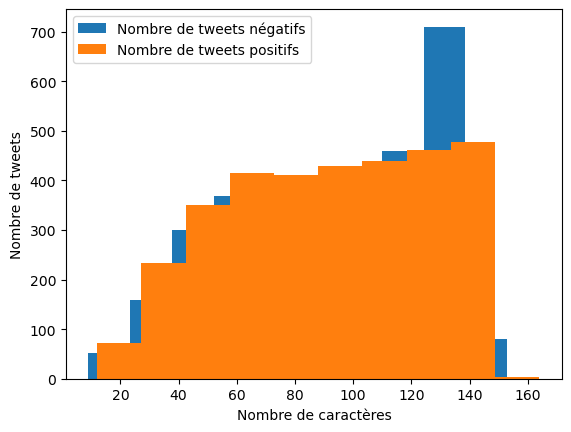

In [10]:
# Longueur des tweets
length_text_pos = data[data["target"] == 4]["text"].str.len()
length_text_neg = data[data["target"] == 0]["text"].str.len() 
plt.hist(length_text_neg, label="Nombre de tweets négatifs") 
plt.hist(length_text_pos, label="Nombre de tweets positifs") 
plt.xlabel("Nombre de caractères")
plt.ylabel("Nombre de tweets")
plt.legend() 
plt.show()

Ce sont des contenus typiques de tweets: citation (@), liens, utilisation d'abbréviations et de variations d'orthographe, ponctuation pour exprimer les sentiments <br>


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6588 entries, 364415 to 1570686
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  6588 non-null   int64 
 1   ids     6588 non-null   int64 
 2   date    6588 non-null   object
 3   flag    6588 non-null   object
 4   user    6588 non-null   object
 5   text    6588 non-null   object
dtypes: int64(2), object(4)
memory usage: 360.3+ KB


In [12]:
data.nunique()

target       2
ids       6582
date      6543
flag         1
user      6279
text      6562
dtype: int64

In [13]:
print(data.isna().sum())

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


In [14]:
for col in data.columns:
    n = data.duplicated(subset=col).sum()
    print(f'col : {col} -> duplicated : {n}')

col : target -> duplicated : 6586
col : ids -> duplicated : 6
col : date -> duplicated : 45
col : flag -> duplicated : 6587
col : user -> duplicated : 309
col : text -> duplicated : 26


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trouver les doublons basés sur la colonne 'ids'
duplicates = data[data.duplicated(subset=['ids'], keep=False)]
display(duplicates.sort_values(by="ids"))

# Groupby sur 'ids' et additionner les valeurs de 'target'
grouped_data = duplicates.groupby('ids')['target'].sum().reset_index()

# Afficher les valeurs uniques de la colonne 'target'
unique_values = grouped_data['target'].unique()
print("Valeurs uniques de la colonne 'target' :", unique_values)


,target,ids,date,flag,user,text
42578,0,1676160753,Fri May 01 21:15:30 PDT 2009,NO_QUERY,littletigr,@aneetasee no not after that plane ticket BUT I'm super excited to see the fam after three years
859693,4,1676160753,Fri May 01 21:15:30 PDT 2009,NO_QUERY,littletigr,@aneetasee no not after that plane ticket BUT I'm super excited to see the fam after three years
235348,0,1979765929,Sun May 31 04:25:06 PDT 2009,NO_QUERY,lasic,"@jabogan LOL, why creepy? ok with me... bummer, school Moodle is down prob'ly due to upgrade at DET this w'end - back Tue, sorry"
1164524,4,1979765929,Sun May 31 04:25:06 PDT 2009,NO_QUERY,lasic,"@jabogan LOL, why creepy? ok with me... bummer, school Moodle is down prob'ly due to upgrade at DET this w'end - back Tue, sorry"
316351,0,2002387780,Tue Jun 02 04:03:52 PDT 2009,NO_QUERY,SilviaEmilia,"flying back to Germany today..already miss home feels like I am going to cry until boarding time...well, see u tomorrow"
1287627,4,2002387780,Tue Jun 02 04:03:52 PDT 2009,NO_QUERY,SilviaEmilia,"flying back to Germany today..already miss home feels like I am going to cry until boarding time...well, see u tomorrow"
379890,0,2052444682,Sat Jun 06 00:45:08 PDT 2009,NO_QUERY,ReMisterGeneral,@ChrissyMBot no tetleys at the airport I shall have to sample 'american breakfast tea'. Heaven forbid
1382193,4,2052444682,Sat Jun 06 00:45:08 PDT 2009,NO_QUERY,ReMisterGeneral,@ChrissyMBot no tetleys at the airport I shall have to sample 'american breakfast tea'. Heaven forbid
442028,0,2067161979,Sun Jun 07 11:51:35 PDT 2009,NO_QUERY,Morenah08,"I'll go Skate Boarding Down My House! But...I'm sad, One person isn't with me now! s2"
1481909,4,2067161979,Sun Jun 07 11:51:35 PDT 2009,NO_QUERY,Morenah08,"I'll go Skate Boarding Down My House! But...I'm sad, One person isn't with me now! s2"


Valeurs uniques de la colonne 'target' : [4]


En faisant la somme des target sur les lignes en doublons on a uniquement la valeur "4" ce qui veut dire que c'est le résultat de 0+4 donc ce sont des tweets qui sont identiques mais ont été jugés à la fois positifs et négatifs, autant les supprimer.

In [16]:
# Trouver les doublons basés sur toutes les colonnes sauf 'target'
duplicates = data[data.duplicated(subset=['ids', 'date', 'flag', 'user', 'text'], keep=False)]

# Supprimer les doublons
data = data.drop(duplicates.index)

In [17]:
# Trouver les doublons basés sur les colonnes date, flag, user, text, et target
duplicates_text_target = data[data.duplicated(subset=['date', 'flag', 'user', 'text', 'target'], keep=False)]
data = data.drop_duplicates(subset=['date', 'flag', 'user', 'text', 'target'], keep='first')
duplicates_text_target

,target,ids,date,flag,user,text
291475,0,1995715901,Mon Jun 01 13:56:04 PDT 2009,NO_QUERY,carolsantini,well i'm feeling sad for the family of who were in Air France plane that disappear im so sorry !
291477,0,1995715937,Mon Jun 01 13:56:04 PDT 2009,NO_QUERY,carolsantini,well i'm feeling sad for the family of who were in Air France plane that disappear im so sorry !
1418769,4,2057837639,Sat Jun 06 13:45:25 PDT 2009,NO_QUERY,PastorJonCannon,"Monitor at Chicago aiport says my flight to Raliegh, NC is &quot;on time&quot; - pray that it stays that way!"
1418768,4,2057837598,Sat Jun 06 13:45:25 PDT 2009,NO_QUERY,PastorJonCannon,"Monitor at Chicago aiport says my flight to Raliegh, NC is &quot;on time&quot; - pray that it stays that way!"


In [18]:
# Trouver les doublons basés sur les colonnes flag, user, text
duplicates_text_user = data[data.duplicated(subset=['flag', 'user', 'text'], keep=False)]
duplicates_text_user

,target,ids,date,flag,user,text
1372325,4,2051242027,Fri Jun 05 21:17:51 PDT 2009,NO_QUERY,PatrickAnna,http://www.twitpic.com/48mky Anna &amp; her brother Albert enjoying the view while flying without a plane...
1386767,4,2052865326,Sat Jun 06 02:19:45 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://short.to/dlnc
1454778,4,2063355857,Sun Jun 07 02:19:41 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://short.to/dlnc
1446052,4,2062459855,Sat Jun 06 23:17:39 PDT 2009,NO_QUERY,PatrickAnna,http://www.twitpic.com/48mky Anna &amp; her brother Albert enjoying the view while flying without a plane...
1202739,4,1985909234,Sun May 31 18:00:16 PDT 2009,NO_QUERY,PatrickAnna,Anna and her brother Albert were about to jump out of the plane... http://twitpic.com/3i493
858086,4,1574066791,Tue Apr 21 04:06:41 PDT 2009,NO_QUERY,PatrickAnna,Anna and her brother Albert were about to jump out of the plane... http://twitpic.com/3i493
845589,4,1564251142,Mon Apr 20 02:33:09 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://twitpic.com/3i44g
846153,4,1564349281,Mon Apr 20 03:03:08 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://twitpic.com/3i44g


In [19]:
# Groupby sur 'ids' et additionner les valeurs de 'target'
grouped_data = duplicates_text_user.groupby('text')['target'].sum().reset_index()

# Afficher les valeurs uniques de la colonne 'target'
unique_values = grouped_data['target'].unique()
print("Valeurs uniques de la colonne 'target' :", unique_values)

Valeurs uniques de la colonne 'target' : [8]


Certains messages sont répétés un grand nombre de fois, ça peut fausser l'analyse.

In [20]:
# Supprimer les doublons
data = data.drop(duplicates_text_user.index)

In [21]:
# Trouver les doublons basés sur les colonnes text
duplicates_text = data[data.duplicated(subset=['text'], keep=False)]
duplicates_text

,target,ids,date,flag,user,text
307389,0,2000460643,Mon Jun 01 22:09:58 PDT 2009,NO_QUERY,rachelslott,OH WOW FAIL. My thoughts are with all those of the Air France flight and their families
319656,0,2003104662,Tue Jun 02 05:53:18 PDT 2009,NO_QUERY,houseplanet,AIR FRANCE FLIGHT 447 --Brazilian Air Force confirms a plane seat was found 650km NE of Fernando de Noronha
202006,0,1972027290,Sat May 30 08:24:29 PDT 2009,NO_QUERY,jediabe,On my way to the airport
14963,0,1553925555,Sat Apr 18 15:35:18 PDT 2009,NO_QUERY,Andrestwoo,Grounded
233890,0,1979467276,Sun May 31 03:10:20 PDT 2009,NO_QUERY,BeebaDiva,On my way to the airport
770027,0,2301851016,Tue Jun 23 15:59:59 PDT 2009,NO_QUERY,benbrochill,Going to mcdonalds. I miss annet and the crew.
770066,0,2301863291,Tue Jun 23 16:00:51 PDT 2009,NO_QUERY,Adolfh71,Going to mcdonalds. I miss annet and the crew.
319863,0,2003152114,Tue Jun 02 05:59:15 PDT 2009,NO_QUERY,jacobowsky,AIR FRANCE FLIGHT 447 --Brazilian Air Force confirms a plane seat was found 650km NE of Fernando de Noronha
401717,0,2057746687,Sat Jun 06 13:35:05 PDT 2009,NO_QUERY,123fund,At the airport.
475933,0,2177742119,Mon Jun 15 06:37:38 PDT 2009,NO_QUERY,zacharypatchan,on the way to the airport


In [22]:
# Groupby sur 'text' et calculer l'écart type sur les valeurs de 'target'
grouped_data = duplicates_text_user.groupby('text')['target'].std().reset_index()

In [23]:
grouped_data.target.unique()

array([0.])

Text(0.5, 1.0, 'Histogramme des valeurs de Target et de leurs fréquences')

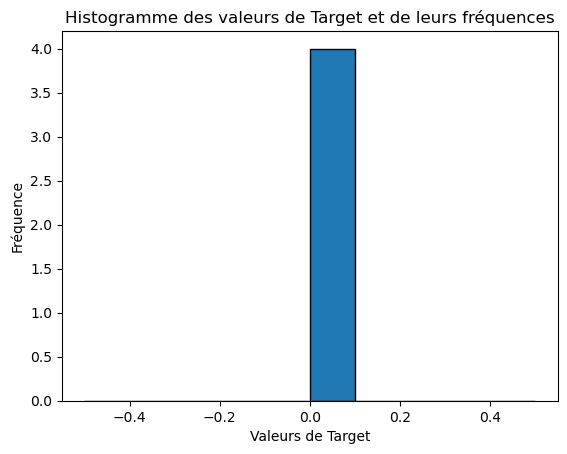

In [24]:
import matplotlib.pyplot as plt

# Créer un histogramme des valeurs de grouped_data.target
plt.hist(grouped_data['target'], bins=10, edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Valeurs de Target')
plt.ylabel('Fréquence')
plt.title('Histogramme des valeurs de Target et de leurs fréquences')

In [25]:
# Filtrer les textes dans grouped_data où target n'est pas nul
non_zero_texts = grouped_data[grouped_data['target'] != 0]['text']

# Supprimer les lignes dans data où 'text' est dans non_zero_texts
data = data[~data['text'].isin(non_zero_texts)]

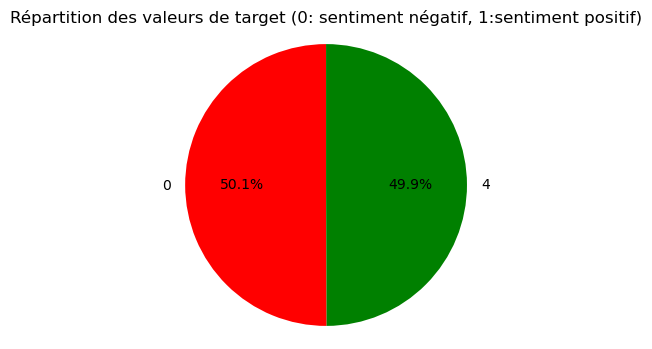

In [26]:
# Répartition des valeurs de la colonne 'target'
repartition_target = data['target'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(repartition_target, labels=repartition_target.index, autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title('Répartition des valeurs de target (0: sentiment négatif, 1:sentiment positif)')
plt.axis('equal')  # Pour s'assurer que le pie chart est bien circulaire
plt.show()

La valeur du score de sentiment de 4 porte à confusion, on va changer pour 1

## Problématique métier
Le client demande de détecter les bad buzz, lors de l'appréciation de performance du modèle.
Dans un souci de conformité avec les pratiques et les règles de scikit-learn nous allons modifier les valeurs de target afin que l'occurence d'un sentiment négatif (actuellement 0) génère la classe 1 (détection de l'événement recherché). Comme les classes sont équilibrées on basera l'optimisation sur l'accuracy (exactitude de prédiction). Pour des modèles de performances proches on pourra chosir la métrique qui nous permettra de minimiser les faux négatifs: ce sont des sentiments négatifs (classe 1 réelle) qui sont interprétés par l'algorithme comme des sentiments positifs (classe 0).
On s'interressera donc principalement au rappel et dans une moindre mesure à F1 (moyenne harmonique entre faux négatifs et vrais positifs).

In [27]:
# Sauvegarde des valeurs initiales des scores de sentiment
data['sentiment_score'] = data['target']

In [28]:
# modifier data['target'] pour que les valeurs 4 deviennent 0 et les valeurs 0 deviennent 1
data['target'] = data['target'].replace({4: 0, 0: 1})

In [29]:
# Sauvegarder les tweets filtrés dans un nouveau fichier CSV
data_filtered.to_csv('./data/filtered_tweets.csv', index=True)

## Exploration et nettoyage du vocabulaire

### Détection de la langue

In [30]:
# ! pip install spacy-langdetect
# A effectuer dans le terminal python -m spacy download en_core_web_sm
! python --version
# ! pip install tqdm

Python 3.12.5


In [31]:
import pandas as pd
import spacy
from spacy_langdetect import LanguageDetector
from spacy.language import Language
from tqdm import tqdm

# Fonction pour ajouter le détecteur de langue à spaCy
def get_lang_detector(nlp, name):
    return LanguageDetector()

# Charger le modèle de langue anglais
nlp = spacy.load("en_core_web_sm")

# Vérifiez si l'usine existe déjà
if "language_detector" not in nlp.pipe_names:
    Language.factory("language_detector", func=get_lang_detector)
    nlp.add_pipe('language_detector', last=True)

# Fonction pour détecter la langue
def detect_language(text):
    doc = nlp(text)
    return doc._.language['language']

# Appliquer la détection de langue avec une barre de progression
tqdm.pandas()  # Activer tqdm pour les pandas DataFrame
data['language'] = data['text'].progress_apply(detect_language)
data = data[data['language'] == 'en']

# Supprimer la colonne 'language' si elle n'est plus nécessaire
data = data.drop(columns=['language'])

data.shape


100%|█████████████████████████████████████████████████████████████████████████████| 6566/6566 [00:52<00:00, 125.80it/s]


(6474, 7)

On s'est restreint à la langue anglaise.

### Nettoyage (adapté aux tweets)

In [32]:
%time
import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import numpy as np
import pandas as pd
import sklearn

# Libraries and packages for text (pre-)processing 
import string
import re
import nltk

print("Python version:", sys.version)
print("Version info.:", sys.version_info)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("skearn version:", sklearn.__version__)
print("re version:", re.__version__)
print("nltk version:", nltk.__version__)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

CPU times: total: 0 ns
Wall time: 0 ns
Python version: 3.12.5 | packaged by Anaconda, Inc. | (main, Sep 12 2024, 18:18:29) [MSC v.1929 64 bit (AMD64)]
Version info.: sys.version_info(major=3, minor=12, micro=5, releaselevel='final', serial=0)
pandas version: 2.2.2
numpy version: 1.26.4
skearn version: 1.5.1
re version: 2.2.1
nltk version: 3.9.1


#### Données

Nous allons tester nos fonctions sur quelques lignes sélectionnées au hasard

In [33]:
import random

# Choisir dix indices au hasard
random_indices = random.sample(range(len(data)), 10)

# Créer un DataFrame avec les lignes sélectionnées
data_sample = data.iloc[random_indices]

# Afficher les lignes sélectionnées pour vérification
pd.set_option('display.max_colwidth', None)
display(data_sample)

,target,ids,date,flag,user,text,sentiment_score
1010660,0,1881021623,Fri May 22 03:19:43 PDT 2009,NO_QUERY,Nonoakako,"@OfficialBale Oh dear try to relax more, I gotta check out those interviews, have a nice &amp; safe flight &lt;3.",4
476619,1,2177936042,Mon Jun 15 06:56:37 PDT 2009,NO_QUERY,JulianLomas,had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed,0
115915,1,1827342048,Sun May 17 10:30:32 PDT 2009,NO_QUERY,AmandaAmos,In dallas - early - an hour until my next flight,0
1463813,0,2064169603,Sun Jun 07 05:27:13 PDT 2009,NO_QUERY,brycedavisss,At the airport !!!!,4
1048316,0,1958135188,Fri May 29 02:46:52 PDT 2009,NO_QUERY,Ms211nLA,@FillmoreRich3 @DEO415 @SimonaSpeaks @SamSneaker @ms211nla @OhSoSexy730 @msfamous @echohattix What's goin' zone early AM crew?,4
588304,1,2216609567,Wed Jun 17 19:43:03 PDT 2009,NO_QUERY,MelLarsen,Back from vacation. Airline lost one of our carseats.,0
1166523,0,1979944078,Sun May 31 05:07:04 PDT 2009,NO_QUERY,Spors,Chillin in the Ottawa airport till flyte time!,4
1368483,0,2050603118,Fri Jun 05 18:58:12 PDT 2009,NO_QUERY,LuxNLavi,omg. we could start our own dj crew! @MistaTNN we'd be super savage!,4
1342470,0,2032750167,Thu Jun 04 11:42:47 PDT 2009,NO_QUERY,theandyman,"@chelseytay Your pictures are awesome, keep up the awesome work. And go Crew #untuckem",4
316309,1,2002379866,Tue Jun 02 04:02:28 PDT 2009,NO_QUERY,adylma,French plane from Rio de Janeiro to Paris hit by lightening and lost from radar.,0


In [34]:
import spacy

# Tokenisation avec Spacy# Charger le modèle de langue
nlp = spacy.load('en_core_web_sm')

# Tokeniser les textes
data_sample['tokens'] = data_sample['text'].apply(lambda x: [token.text for token in nlp(x)])

# Afficher les lignes sélectionnées et tokenisées pour vérification
pd.set_option('display.max_colwidth', None)
display(data_sample)

,target,ids,date,flag,user,text,sentiment_score,tokens
1010660,0,1881021623,Fri May 22 03:19:43 PDT 2009,NO_QUERY,Nonoakako,"@OfficialBale Oh dear try to relax more, I gotta check out those interviews, have a nice &amp; safe flight &lt;3.",4,"[@OfficialBale, Oh, dear, , try, to, relax, more, ,, I, got, ta, check, out, those, interviews, ,, have, a, nice, &, amp, ;, safe, flight, &, lt;3, .]"
476619,1,2177936042,Mon Jun 15 06:56:37 PDT 2009,NO_QUERY,JulianLomas,had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed,0,"[had, a, minor, prang, in, the, car, -, the, Bishop, really, should, have, a, wider, gate, to, his, orchard, ., Well, miffed]"
115915,1,1827342048,Sun May 17 10:30:32 PDT 2009,NO_QUERY,AmandaAmos,In dallas - early - an hour until my next flight,0,"[In, dallas, -, early, -, an, hour, until, my, next, flight]"
1463813,0,2064169603,Sun Jun 07 05:27:13 PDT 2009,NO_QUERY,brycedavisss,At the airport !!!!,4,"[At, the, airport, !, !, !, !]"
1048316,0,1958135188,Fri May 29 02:46:52 PDT 2009,NO_QUERY,Ms211nLA,@FillmoreRich3 @DEO415 @SimonaSpeaks @SamSneaker @ms211nla @OhSoSexy730 @msfamous @echohattix What's goin' zone early AM crew?,4,"[@FillmoreRich3, @DEO415, @SimonaSpeaks, @SamSneaker, @ms211nla, @OhSoSexy730, @msfamous, @echohattix, , What, 's, goin', zone, early, AM, crew, ?]"
588304,1,2216609567,Wed Jun 17 19:43:03 PDT 2009,NO_QUERY,MelLarsen,Back from vacation. Airline lost one of our carseats.,0,"[Back, from, vacation, ., , Airline, lost, one, of, our, carseats, ., ]"
1166523,0,1979944078,Sun May 31 05:07:04 PDT 2009,NO_QUERY,Spors,Chillin in the Ottawa airport till flyte time!,4,"[Chillin, in, the, Ottawa, airport, till, flyte, time, !]"
1368483,0,2050603118,Fri Jun 05 18:58:12 PDT 2009,NO_QUERY,LuxNLavi,omg. we could start our own dj crew! @MistaTNN we'd be super savage!,4,"[omg, ., we, could, start, our, own, dj, crew, !, @MistaTNN, we, 'd, be, super, savage, !]"
1342470,0,2032750167,Thu Jun 04 11:42:47 PDT 2009,NO_QUERY,theandyman,"@chelseytay Your pictures are awesome, keep up the awesome work. And go Crew #untuckem",4,"[@chelseytay, Your, pictures, are, awesome, ,, keep, up, the, awesome, work, ., , And, go, Crew, , #, untuckem]"
316309,1,2002379866,Tue Jun 02 04:02:28 PDT 2009,NO_QUERY,adylma,French plane from Rio de Janeiro to Paris hit by lightening and lost from radar.,0,"[French, plane, from, Rio, de, Janeiro, to, Paris, hit, by, lightening, and, lost, from, radar, .]"


In [35]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt_tab')


def count_total_tokens(data_sample, col):
    total_tokens = 0
    for text in data_sample[col]:
        tokens = word_tokenize(text)
        total_tokens += len(tokens)
    print("Nombre total de tokens :", total_tokens)
    return total_tokens

In [36]:
count_total_tokens(data_sample, "text")

Nombre total de tokens : 167


167

#### Fonctions

In [37]:
# Traitement de caractères spécifiques du texte importé de html
# Fonction pour décoder les entités HTML
import html

def decode_html(text):
    return html.unescape(text)

data_sample['cleaned_text'] = data_sample['text'].apply(decode_html)

In [38]:
def remove_URL(text):
    """
        Remove URLs from a sample string
        Adding URLs may be informative about the polarity
        so the URL is relaplace with <url>
    """
    return re.sub(r"https?://\S+|www\.\S+", "<url>", text)

In [39]:
# pip install colorama

In [40]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text'] = data_sample['cleaned_text'].apply(remove_URL)

# Afficher les textes d'origine et les textes modifiés 
from colorama import Fore, Style, init

def display_texts(data_sample, col1, col2):
    for original, cleaned in zip(data_sample[col1], data_sample[col2]):
        print(f"Original: {original}")
        print(f"{Fore.BLUE}Modifié: {cleaned}{Style.RESET_ALL}")
        print('-' * 50)  # Separator between entries (optional)

display_texts(data_sample, "text", "cleaned_text")

Original: @OfficialBale Oh dear  try to relax more, I gotta check out those interviews, have a nice &amp; safe flight &lt;3.
Modifié: @OfficialBale Oh dear  try to relax more, I gotta check out those interviews, have a nice & safe flight <3.
--------------------------------------------------
Original: had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed 
Modifié: had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed 
--------------------------------------------------
Original: In dallas - early - an hour until my next flight 
Modifié: In dallas - early - an hour until my next flight 
--------------------------------------------------
Original: At the airport !!!! 
Modifié: At the airport !!!! 
--------------------------------------------------
Original: @FillmoreRich3 @DEO415 @SimonaSpeaks @SamSneaker @ms211nla @OhSoSexy730 @msfamous @echohattix  What's goin' zone early AM crew? 
Modifié: @

In [41]:
def remove_mentions(text):
    """
    Remove mentions (words starting with @) from a sample string
    As mentions may be informative regarding sentence polarity
    let's replace by <mention>
    """
    return re.sub(r'(@[A-Za-z0-9_]+)', '<mention>', text)


In [42]:
# Appliquer la fonction remove_mention et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text2'] = data_sample['cleaned_text'].apply(remove_mentions)

display_texts(data_sample, "text", "cleaned_text2")

Original: @OfficialBale Oh dear  try to relax more, I gotta check out those interviews, have a nice &amp; safe flight &lt;3.
Modifié: <mention> Oh dear  try to relax more, I gotta check out those interviews, have a nice & safe flight <3.
--------------------------------------------------
Original: had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed 
Modifié: had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed 
--------------------------------------------------
Original: In dallas - early - an hour until my next flight 
Modifié: In dallas - early - an hour until my next flight 
--------------------------------------------------
Original: At the airport !!!! 
Modifié: At the airport !!!! 
--------------------------------------------------
Original: @FillmoreRich3 @DEO415 @SimonaSpeaks @SamSneaker @ms211nla @OhSoSexy730 @msfamous @echohattix  What's goin' zone early AM crew? 
Modifié: <ment

In [43]:
def reduce_repetitions(text):
    """
    Reduce character repetitions in a sample string
    """
    return re.sub(r'(.)\1{2,}', r'\1\1', text)

In [44]:
# Appliquer la fonction reduce_repetitions et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text3'] = data_sample['cleaned_text2'].apply(reduce_repetitions)

display_texts(data_sample, "text", "cleaned_text3")

Original: @OfficialBale Oh dear  try to relax more, I gotta check out those interviews, have a nice &amp; safe flight &lt;3.
Modifié: <mention> Oh dear  try to relax more, I gotta check out those interviews, have a nice & safe flight <3.
--------------------------------------------------
Original: had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed 
Modifié: had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed 
--------------------------------------------------
Original: In dallas - early - an hour until my next flight 
Modifié: In dallas - early - an hour until my next flight 
--------------------------------------------------
Original: At the airport !!!! 
Modifié: At the airport !! 
--------------------------------------------------
Original: @FillmoreRich3 @DEO415 @SimonaSpeaks @SamSneaker @ms211nla @OhSoSexy730 @msfamous @echohattix  What's goin' zone early AM crew? 
Modifié: <mentio

##### Dictionnaires slang, abrev, emoticons

In [45]:
# Dictionnaries of common language specifics of tweets
# Typos, slang and other
sample_typos_slang_dict = {
    "w/e": "whatever",
    "usagov": "usa government",
    "recentlu": "recently",
    "ph0tos": "photos",
    "amirite": "am i right",
    "exp0sed": "exposed",
    "luv": "love",
    "amageddon": "armageddon",
    "trfc": "traffic",
    "a/c": "air conditioning",
    "16yr": "16 year",
    "NYC": "New York",
    "hahaha": "laughs",
    "u": "you",
    "tru": "through"
}

# Sentiments emoticon as characters
sample_emoticons_dict = {
    ":)": "smile",
    ":(": "sad",
    ":D": "grin",
    "XD": "laugh",
    ":'(": "cry",
    ":P": "playful",
    ";)": "wink",
    ":O": "surprised",
    ":/": "skeptical",
    ":|": "neutral",
    ":*": "kiss",
    ":-)": "smile",
    ":-(": "sad",
    ":-D": "grin",
    ":-P": "playful",
    ";-)": "wink",
    ":-O": "surprised",
    ":-/": "skeptical",
    ":-|": "neutral",
    ":-*": "kiss",
    "<3": "love",
    "<33": "deep love"
}

# Common abbreviations
sample_abbr_dict = {
    "$": " dollar ",
    "€": " euro ",
    "4ao": "for adults only",
    "a.m": "before midday",
    "a3": "anytime anywhere anyplace",
    "aamof": "as a matter of fact",
    "acct": "account",
    "adih": "another day in hell",
    "afaic": "as far as i am concerned",
    "afaict": "as far as i can tell",
    "afaik": "as far as i know",
    "afair": "as far as i remember",
    "afk": "away from keyboard",
    "app": "application",
    "approx": "approximately",
    "apps": "applications",
    "asap": "as soon as possible",
    "asl": "age, sex, location",
    "atk": "at the keyboard",
    "ave.": "avenue",
    "ayor": "at your own risk",
    "b&b": "bed and breakfast",
    "b.c": "before christ",
    "b2b": "business to business",
    "b2c": "business to customer",
    "b4": "before",
    "bae": "before anyone else",
    "bak": "back at keyboard",
    "bbc": "british broadcasting corporation",
    "bfn": "bye for now",
    "blvd": "boulevard",
    "bout": "about",
    "brb": "be right back",
    "bros": "brothers",
    "btw": "by the way",
    "c/o": "care of",
    "cia": "central intelligence agency",
    "cu": "see you",
    "cv": "curriculum vitae",
    "dm": "direct message",
    "&": "and",
    "eg": "example",
    "faq": "frequently asked questions",
    "fb": "facebook",
    "ftw": "for the win",
    "fyi": "for your information",
    "glhf": "good luck have fun",
    "gn": "good night",
    "gmt": "greenwich mean time",
    "gps": "global positioning system",
    "gr8": "great",
    "gtfo": "get the fuck out",
    "irl": "in real life",
    "jk": "just kidding",
    "l8r": "later",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "pov": "point of view",
    "smh": "shake my head",
    "tbh": "to be honest",
    "ttyl": "talk to you later",
    "wtf": "what the fuck"
}

In [46]:
import re

def other_clean(text, slang=sample_typos_slang_dict,
               emoticons=sample_emoticons_dict, abbr=sample_abbr_dict):
    """
    Other manual text cleaning techniques
    Needs that slang, emoticons and abbrv dictionnaries be defined
    """

    # Adapted regex to capture emoticons preceded by spaces or punctuation
    sample_typos_slang_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in slang.keys()) + r')\b')
    sample_emoticons_pattern = re.compile(r'(\s|[.?!])(' + '|'.join(re.escape(key) for key in emoticons.keys()) + r')(?!\w)')
    sample_abbr_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in abbr.keys()) + r')\b')
    
    # Replace typos, slang, and abbreviations in text
    text = sample_typos_slang_pattern.sub(lambda x: slang[x.group()], text)
    text = sample_emoticons_pattern.sub(lambda x: x.group(1) + emoticons[x.group(2)], text)
    text = sample_abbr_pattern.sub(lambda x: abbr[x.group()], text)
    
    return text



In [47]:
# Appliquer la fonction other_clean et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text4'] = data_sample['cleaned_text3'].apply(other_clean)

display_texts(data_sample, "text", "cleaned_text4")

Original: @OfficialBale Oh dear  try to relax more, I gotta check out those interviews, have a nice &amp; safe flight &lt;3.
Modifié: <mention> Oh dear  try to relax more, I gotta check out those interviews, have a nice & safe flight love.
--------------------------------------------------
Original: had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed 
Modifié: had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed 
--------------------------------------------------
Original: In dallas - early - an hour until my next flight 
Modifié: In dallas - early - an hour until my next flight 
--------------------------------------------------
Original: At the airport !!!! 
Modifié: At the airport !! 
--------------------------------------------------
Original: @FillmoreRich3 @DEO415 @SimonaSpeaks @SamSneaker @ms211nla @OhSoSexy730 @msfamous @echohattix  What's goin' zone early AM crew? 
Modifié: <ment

In [48]:
def remove_special_characters(text):
    """
    Remove special characters and malformed emoticons from a sample string
    Hashtags are tagged as such
    """
    # Supprimer les hashtags
    text = re.sub(r"#\w+", "<hashtag>", text)
    # Supprimer les @ résiduels
    text = re.sub(r'@\s', '', text)
    # Supprimer les mots entourés par des "*"
    text = re.sub(r'\*\w+\*', '', text)
    # Supprimer les caractères non-ASCII
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    return text

In [49]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text5'] = data_sample['cleaned_text4'].apply(remove_special_characters)

display_texts(data_sample, "text", "cleaned_text5")

Original: @OfficialBale Oh dear  try to relax more, I gotta check out those interviews, have a nice &amp; safe flight &lt;3.
Modifié: <mention> Oh dear  try to relax more, I gotta check out those interviews, have a nice & safe flight love.
--------------------------------------------------
Original: had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed 
Modifié: had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed 
--------------------------------------------------
Original: In dallas - early - an hour until my next flight 
Modifié: In dallas - early - an hour until my next flight 
--------------------------------------------------
Original: At the airport !!!! 
Modifié: At the airport !! 
--------------------------------------------------
Original: @FillmoreRich3 @DEO415 @SimonaSpeaks @SamSneaker @ms211nla @OhSoSexy730 @msfamous @echohattix  What's goin' zone early AM crew? 
Modifié: <ment

In [50]:
count_total_tokens(data_sample, "cleaned_text5")

Nombre total de tokens : 174


174

### Correction d'orthographe

In [51]:
# ! pip install language-tool-python
# ! pip install contractions # contractions n'est pas reconnu dans cet environnement 😤

In [52]:
import language_tool_python
import contractions
from tqdm import tqdm

# Initialiser l'outil LanguageTool pour l'anglais
tool = language_tool_python.LanguageTool('en-US')

# Fonction pour corriger l'orthographe incluant l'expansion des contractions
def correct_spelling(text):
    text = contractions.fix(text)  # Développer les contractions avec contractions.fix
    matches = tool.check(text)
    corrected_text = language_tool_python.utils.correct(text, matches)
    return corrected_text

In [53]:
# Appliquer la fonction avec tqdm pour suivre le temps de calcul
tqdm.pandas(desc="Correction de texte")
data_sample['cleaned_text6'] = data_sample['cleaned_text5'].progress_apply(correct_spelling)

display_texts(data_sample, "text", "cleaned_text6")

Correction de texte: 100%|█████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.09it/s]

Original: @OfficialBale Oh dear  try to relax more, I gotta check out those interviews, have a nice &amp; safe flight &lt;3.
Modifié: <mention> Oh dear try to relax more, I got to check out those interviews, have a nice & safe flight love.
--------------------------------------------------
Original: had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed 
Modifié: Had a minor prang in the car - the Bishop really should have a wider gate to his orchard. Well miffed 
--------------------------------------------------
Original: In dallas - early - an hour until my next flight 
Modifié: In Dallas - early - an hour until my next flight 
--------------------------------------------------
Original: At the airport !!!! 
Modifié: At the airport !! 
--------------------------------------------------
Original: @FillmoreRich3 @DEO415 @SimonaSpeaks @SamSneaker @ms211nla @OhSoSexy730 @msfamous @echohattix  What's goin' zone early AM crew? 
Modifié: <ment

#### Regroupement des fonctions de traitement de texte manuel

In [54]:
def clean_text(text, sample_typos_slang=sample_typos_slang_dict,
              sample_emoticons=sample_emoticons_dict,
              sample_abbr=sample_abbr_dict):
    """
    Clean text by decoding html, removing URLs, mentions, special characters, and other manual cleaning techniques
    Needs all dictionnaries embedded in used functions be defined
    """
    # Decode html
    text = decode_html(text)
    
    # Remove URLs
    text = remove_URL(text)
    
    # Remove mentions
    text = remove_mentions(text)

    # Reduce repetitions
    text = reduce_repetitions(text)
    
    # Other manual clean
    text = other_clean(text)
    
    # Remove special characters and malformed emoticons
    text = remove_special_characters(text)
    
    # Correct spelling
    text = correct_spelling(text)
    
    return text


#### Application des fonctions sur l'ensemble du dataset

In [55]:
from tqdm import tqdm

# Appliquer la fonction avec suivi de progression
tqdm.pandas(desc="Cleaning Text")
data["cleaned_text"] = data["text"].progress_apply(clean_text)

Cleaning Text: 100%|███████████████████████████████████████████████████████████████| 6474/6474 [03:44<00:00, 28.90it/s]


In [56]:
display(data[['text', 'cleaned_text']])

,text,cleaned_text
364415,"Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it.","Bought a book to read on the plane. ""Smashed"". So far, it sounds an awful lot like my childhood. I may not be able to get through it."
61776,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves
307389,OH WOW FAIL. My thoughts are with all those of the Air France flight and their families,"OH, WOW FAIL. My thoughts are with all those of the Air France flight and their families"
764377,Off to the airport! Dallas here I come!,Off to the airport! Dallas here I come!
337691,Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket. iPhones are shitty!!!!!,Broke my iPhone tonight from slipping pedals landing on the seat from a tail whip. My phone was in my back pocket. iPhones are shitty!!
...,...,...
1069056,I'm chillen at the airport waiting for my flight to San Francisco.... I'm excited,I am chilled at the airport waiting for my flight to San Francisco. I am excited
1077861,Yay. Getting on the plane. Its about time!,Yay. Getting on the plane. It's about time!
1115041,"On the plane now. I do quite like Easyjet. They get a bad ride cuz they are budget, but I find them to be pretty proffessional","On the plane now. I do quite like EasyJet. They get a bad ride because they are budget, but I find them to be pretty professional"
1011270,at the airport waiting to go on my Indy 500 vacation...whoohoo!,At the airport waiting to go on my Indy 500 vacation.hoodoo!


In [57]:
# Sauvegarder le DataFrame data
data.to_csv('./data/data_cleaned.csv', index=True)
import pandas as pd
# data = pd.read_csv('./data/data_cleaned.csv', index_col=0)

La colonne "cleaned_text" est le résultat d'un traitement fin, souvent manuel, adapté à la forme d'expression des tweets.

### Tokenisation et normalisation du vocabulaire

### Tokenisation

In [58]:
# Tokenizing the tweet base texts.
from nltk.tokenize import word_tokenize

In [59]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Exemple de texte nettoyé dans data['cleaned_text']
# data['cleaned_text'] = ["This is a <test> tweet.", "Another <example> with <important> info."]

def protect_balises(text):
    """
    Remplacer les séquences entre balises < > par des placeholders temporaires pour protéger ces mots avant tokenisation.
    """
    # Trouver toutes les séquences entre < >
    balises = re.findall(r'<.*?>', text)
    
    # Remplacer chaque séquence par un placeholder unique [BALISE_X]
    for i, balise in enumerate(balises):
        text = text.replace(balise, f' BALISE_{i} ')
    
    return text, balises

def restore_balises(tokens, balises):
    """
    Restaurer les mots protégés par des placeholders après la tokenisation.
    """
    # Remplacer les placeholders dans la liste de tokens par les balises originales
    for i, token in enumerate(tokens):
        if token.startswith("BALISE_"):
            # Extraire l'index et restaurer la balise correspondante
            index = int(token.split('_')[1])
            tokens[i] = balises[index]
    
    return tokens

def tokenize_and_preserve(text):
    """
    Tokeniser le texte tout en préservant les mots entre balises < >.
    """
    # Protéger les balises et obtenir les placeholders
    protected_text, balises = protect_balises(text)
    
    # Tokenisation classique avec nltk.word_tokenize
    tokens = word_tokenize(protected_text)
    
    # Restaurer les balises après la tokenisation
    final_tokens = restore_balises(tokens, balises)
    
    return final_tokens

# Appliquer la fonction de tokenisation à la colonne 'cleaned_text'
data['tokenized'] = data['cleaned_text'].apply(tokenize_and_preserve)



In [60]:
display(data[['cleaned_text', 'tokenized']].sample(10))

,cleaned_text,tokenized
225015,<mention> I had not cried in five years I am still at the airport waiting for bus. Cops stopped me. Mustn't wear shirts w/ bombs on them.,"[<mention>, I, had, not, cried, in, five, years, I, am, still, at, the, airport, waiting, for, bus, ., Cops, stopped, me, ., Must, n't, wear, shirts, w/, bombs, on, them, .]"
1500916,Fixing to eat TGI Fridays w/church crew yummy food.my tummy's growling!,"[Fixing, to, eat, TGI, Fridays, w/church, crew, yummy, food.my, tummy, 's, growling, !]"
118037,<mention> Lucky get - I have not been allowed to play with mine this weekend Have to upgrade the RAM too - a scary lid off job!,"[<mention>, Lucky, get, -, I, have, not, been, allowed, to, play, with, mine, this, weekend, Have, to, upgrade, the, RAM, too, -, a, scary, lid, off, job, !]"
951824,Here in Bangkok airport. Flight to Phuket at 5:30,"[Here, in, Bangkok, airport, ., Flight, to, Phuket, at, 5:30]"
1011542,"Flight to London delayed by half an hour, but as I am in the Emirates lounge I really could not be happier","[Flight, to, London, delayed, by, half, an, hour, ,, but, as, I, am, in, the, Emirates, lounge, I, really, could, not, be, happier]"
275023,Just heard the awful news about the Rio-France Air-France flight.praying for the 228 passengers and crew,"[Just, heard, the, awful, news, about, the, Rio-France, Air-France, flight.praying, for, the, 228, passengers, and, crew]"
94761,"It's early in the morning, first thing at five was to recognize that a meeting has been cancelled - so I cancelled my flight as well","[It, 's, early, in, the, morning, ,, first, thing, at, five, was, to, recognize, that, a, meeting, has, been, cancelled, -, so, I, cancelled, my, flight, as, well]"
436988,<mention> I know! Sorry! My plane got delayed in salt lake and I did not make it in time. Wish I could meet you and lee before you leave,"[<mention>, I, know, !, Sorry, !, My, plane, got, delayed, in, salt, lake, and, I, did, not, make, it, in, time, ., Wish, I, could, meet, you, and, lee, before, you, leave]"
890747,Excuse me. Do not hate on my J-crew wellies <url>,"[Excuse, me, ., Do, not, hate, on, my, J-crew, wellies, <url>]"
1162118,"<mention> I have an iPhone 3G, but I would like to have the new one too I will definitely upgrade the OS to 3.0 when it is out.","[<mention>, I, have, an, iPhone, 3G, ,, but, I, would, like, to, have, the, new, one, too, I, will, definitely, upgrade, the, OS, to, 3.0, when, it, is, out, .]"


In [61]:
# Extraire les tokens uniques de la colonne 'tokenized'
tokens_uniques = set(token for tokens in data["tokenized"] for token in tokens)

# Afficher le nombre total de tokens uniques
nombre_total_tokens = len(tokens_uniques)
print(f"Nombre total de tokens dans le vocabulaire : {nombre_total_tokens}")

Nombre total de tokens dans le vocabulaire : 12024


### Réduction du vocabulaire

In [62]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [63]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialiser le lemmatizer et les stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_tokens(tokens):
    # Transformer en minuscule, supprimer les stopwords et effectuer la lemmatisation
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    text = ' '.join(tokens)
    
    # Supprimer les ponctuations spécifiques
    text = re.sub(r'(?<!\.)\.(?!\.)', '', text)  # Supprime les points simples mais pas les doubles points
    text = re.sub(r',', '', text)  # Supprime les virgules
    text = re.sub(r'/', '', text)  # Supprime les slashs
    text = re.sub(r"\(", '', text)  # Supprime les parenthèses ouvrantes
    text = re.sub(r"\)", '', text)  # Supprime les parenthèses fermantes
    text = re.sub(r':', '', text)  # Supprime les :
    text = re.sub(r'\+', '', text)  # Supprime les +
    text = re.sub(r'\-', '', text)  # Supprime les -
    text = re.sub(r'`', '', text)  # Supprime les 
    text = re.sub(r"''", '', text) # Supprime les double guillemets
    
    
    return text

# Appliquer la fonction à la colonne 'tokenized' et créer une nouvelle colonne 'preprocessed_text'
data['preprocessed_text'] = data['tokenized'].apply(preprocess_tokens)

In [64]:
# Tokeniser les textes dans la colonne 'preprocessed_text'
data['preprocessed_tokenized'] = data['preprocessed_text'].apply(tokenize_and_preserve)

# Extraire les tokens uniques de la colonne 'preprocessed_text'
tokens_uniques_final = set(token for tokens in data["preprocessed_tokenized"] for token in tokens)

# Afficher le nombre total de tokens uniques
nombre_total_tokens_final = len(tokens_uniques_final)
print(f"Nombre total de tokens dans le vocabulaire : {nombre_total_tokens_final}")

Nombre total de tokens dans le vocabulaire : 8926


In [65]:
display(data[['text', 'cleaned_text', 'preprocessed_text', 'preprocessed_tokenized']].sample(10))

,text,cleaned_text,preprocessed_text,preprocessed_tokenized
972698,@DJ_AM hope u have a safe flight!,<mention> hope you have a safe flight!,<mention> hope safe flight !,"[<mention>, hope, safe, flight, !]"
976832,@DJ_AM I hope you have a safe flight,<mention> I hope you have a safe flight,<mention> hope safe flight,"[<mention>, hope, safe, flight]"
1320760,@simon of course your tiered! you woke up 4AM! and you're after 2 flights. don't envy you... except the frequent flyer millage you earn,<mention> of course your tiered! You woke up 4AM! And you are after 2 flights. Do not envy you. Except the frequent flyer millage you earn,<mention> course tiered ! woke 4am ! 2 flight envy except frequent flyer millage earn,"[<mention>, course, tiered, !, woke, 4am, !, 2, flight, envy, except, frequent, flyer, millage, earn]"
1364594,@trendebarbie7 #FF: 2 my DC/ VIP CREW @trendebarbie7 @Elmolarchmont @livelovlaugh I luv u guys so much!!!!!,<mention> <hashtag>: 2 my DC/ VIP CREW <mention> <mention> <mention> I love you guys so much!!,<mention> <hashtag> 2 dc vip crew <mention> <mention> <mention> love guy much ! !,"[<mention>, <hashtag>, 2, dc, vip, crew, <mention>, <mention>, <mention>, love, guy, much, !, !]"
35826,"Enjoying Bolivia this week, especially their coffee and perfect weather. Just a pity my luggage didn't follow me","Enjoying Bolivia this week, especially their coffee and perfect weather. Just a pity my luggage did not follow me",enjoying bolivia week especially coffee perfect weather pity luggage follow,"[enjoying, bolivia, week, especially, coffee, perfect, weather, pity, luggage, follow]"
416354,@sc_mu tnxs Scotty. just 4 hrs in london .Konami sucks.luckily you flight! I'd never been able 2catch a flight 2 be &amp; come back in 6hrs!,<mention> TNS Scotty. Just 4 hrs in London . Konami sucks. Luckily you flight! I would never have been able 2catch a flight 2 be & come back in 6hrs!,<mention> tn scotty 4 hr london konami suck luckily flight ! would never able 2catch flight 2 & come back 6hrs !,"[<mention>, tn, scotty, 4, hr, london, konami, suck, luckily, flight, !, would, never, able, 2catch, flight, 2, &, come, back, 6hrs, !]"
317446,#inappropriatemovies &quot;Alive&quot; re:the missing plane,"<hashtag> ""Alive"" re:the missing plane",<hashtag> alive missing plane,"[<hashtag>, alive, missing, plane]"
592206,last night at three palms with the whole crew,Last night at three palms with the whole crew,last night three palm whole crew,"[last, night, three, palm, whole, crew]"
563640,@bengoldacre A very nice set of Caran D'Ache pencils was confiscated from me when I was 12 at Belfast City Airport I was gutted,<mention> A very nice set of Carey D'Ache pencils was confiscated from me when I was 12 at Belfast City Airport I was gutted,<mention> nice set carey d'ache pencil confiscated 12 belfast city airport gutted,"[<mention>, nice, set, carey, d'ache, pencil, confiscated, 12, belfast, city, airport, gutted]"
495375,"upset stomachhh GROUNDED! &amp;jealous, of some hoooee. :/ iiii wwaanntt hhiimmmm,&lt;/3","Upset stomach GROUNDED! Jealous, of some Hooke. Skeptical ii wwaanntt him, </3",upset stomach grounded ! jealous hooke skeptical ii wwaanntt < 3,"[upset, stomach, grounded, !, jealous, hooke, skeptical, ii, wwaanntt, <, 3]"


In [66]:
# Vérifier les valeurs manquantes dans la colonne 'preprocessed_text'
missing_values = data['preprocessed_text'].isnull().sum()

# Afficher le nombre de valeurs manquantes
print(f"Nombre de valeurs manquantes dans 'preprocessed_text': {missing_values}")


Nombre de valeurs manquantes dans 'preprocessed_text': 0


On a pu réduire de 25% le nombre de tokens et il s'avère que nous avons pu extraire des informations de toutes les lignes pré-sélectionnées.

In [67]:
# Calculer la longueur (nombre de tokens) dans les colonnes déjà tokenisées
data['length_tokenized'] = data['tokenized'].apply(len)
data['length_preprocessed_tokenized'] = data['preprocessed_tokenized'].apply(len)

# Afficher la longueur maximale des deux colonnes
print("Max length tokenized (from cleaned_text): ", data['length_tokenized'].max())
print("Max length preprocessed_tokenized: ", data['length_preprocessed_tokenized'].max())


Max length tokenized (from cleaned_text):  40
Max length preprocessed_tokenized:  26


Le nombre de mots maximum dans les colonnes cleaned_text et preprocessed_text sera utile pour paramétrer certains algorithmes comme Glove.

In [68]:
# Sauvegarder le DataFrame data
data.to_csv('./data/data_preprocessed.csv', index=True)
# import pandas as pd
# data = pd.read_csv('./data/data_preprocessed.csv', index_col=0)

In [69]:
# Sauvegarde du dataframe simplifié pour AutoML
data_simple = data[["text", "target"]]
data_simple.to_csv('./data/data_autoML.csv', index=False)

In [70]:
# Sauvegarde du dataframe simplifié pour AutoML
data_simple_cleaned = data[["target", "cleaned_text"]]
data_simple_cleaned.to_csv('./data/data_cleaned_autoML.csv', index=False)

### Utilisation d'un embedding donnant la polarité d'une phrase
Nous allons tester les bibliothèques d'analyse de sentiments sur étagère, pour le texte brut et pour le texte prétraité.<br>
Un benchmark nous a fourni une liste de ressources, nous avons choisi celles qui sont implémentées dans des bibliothèques connues plutôt que des projets isolés (comme tweets_preprocessor ou Afinn).

#### NLTK SentimentIntensityAnalyser
source: https://www.kaggle.com/code/ashagutlapalli/nlp-101-with-nltk-and-spacy-text-analysis

In [71]:
# nltk.download('vader_lexicon')

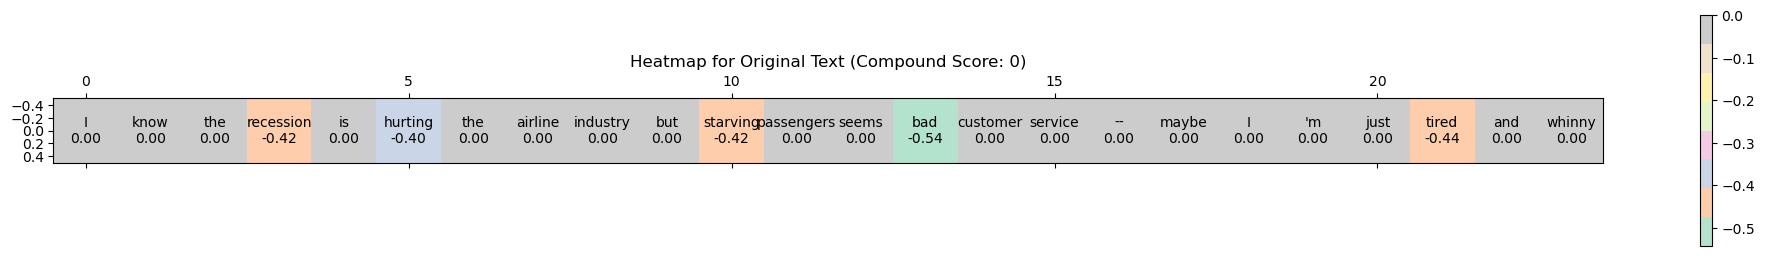

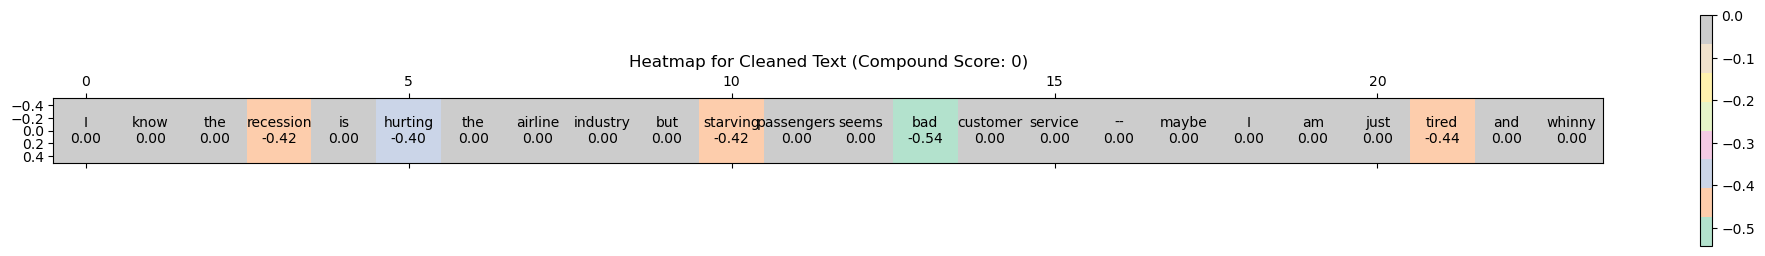

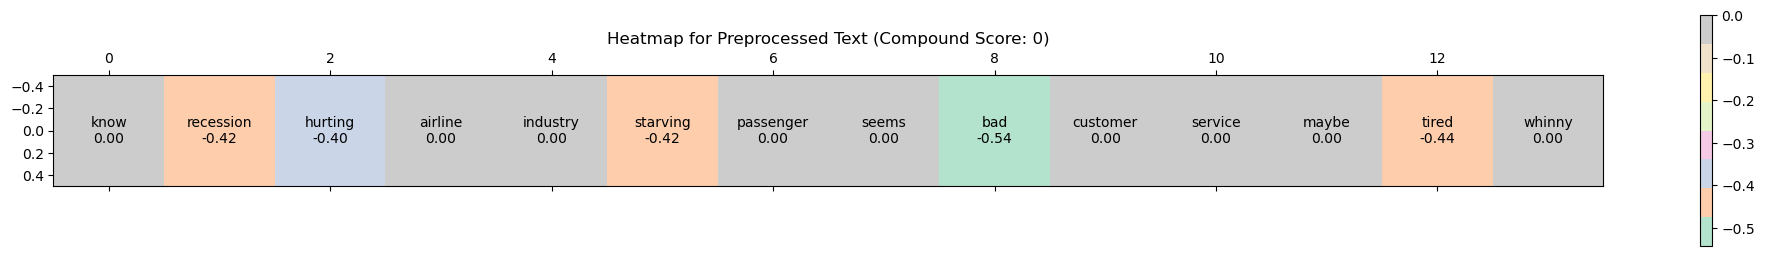

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Sélectionner une ligne au hasard
index = data.sample(1).index[0]
text_original = data.loc[index, 'text']
text_cleaned = data.loc[index, 'cleaned_text']
tokenized_cleaned = data.loc[index, 'tokenized']
text_preprocessed = data.loc[index, 'preprocessed_text']
tokenized_preprocessed = data.loc[index, 'preprocessed_tokenized']

# Initialiser SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def generate_heatmap(text, words, title):
    # Obtenir les scores de polarité pour chaque mot dans la phrase
    scores = [sia.polarity_scores(word)['compound'] for word in words]
    
    # Convertir les scores en tableau numpy
    x = np.array([scores])
    
    # Calculer le score global avec un arrondi
    polarity_scores = sia.polarity_scores(text)
    compound_score = round((polarity_scores['compound'] + 1) / 2)
    
    # Créer la heatmap
    fig, ax = plt.subplots(figsize=(25, 3))
    cax = ax.matshow(x, cmap="Pastel2")
    
    # Ajouter les annotations
    for (i, j), val in np.ndenumerate(x):
        ax.text(j, i, f"{words[j]}\n{val:.2f}", ha='center', va='center')
    
    # Ajouter une barre de couleur
    fig.colorbar(cax)
    
    # Ajouter un titre
    plt.title(f'{title} (Compound Score: {compound_score})')
    plt.show()

# Générer les heatmaps pour chaque colonne
# Pour le texte original, on utilise word_tokenize
words_original = word_tokenize(text_original)
generate_heatmap(text_original, words_original, "Heatmap for Original Text")

# Pour cleaned_text, on utilise la colonne tokenized
generate_heatmap(text_cleaned, tokenized_cleaned, "Heatmap for Cleaned Text")

# Pour preprocessed_text, on utilise la colonne preprocessed_tokenized
generate_heatmap(text_preprocessed, tokenized_preprocessed, "Heatmap for Preprocessed Text")


##### Fonction donnant le score sia depuis une colonne de dataframe

In [73]:
import numpy as np
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

def sentiment_scores(df, column_name):
    # Initialiser SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    # Fonction pour obtenir le score de polarité global pour une phrase
    def get_compound_score(text):
        polarity_scores = sia.polarity_scores(text)
        compound_score = round((polarity_scores['compound'] + 1) / 2)
        return compound_score
    
    # Appliquer la fonction à la colonne spécifiée du DataFrame
    scores = df[column_name].apply(get_compound_score)
    
    return scores

# Obtenir les scores de sentiment avec un seuil
scores_raw_text = sentiment_scores(data, "text")


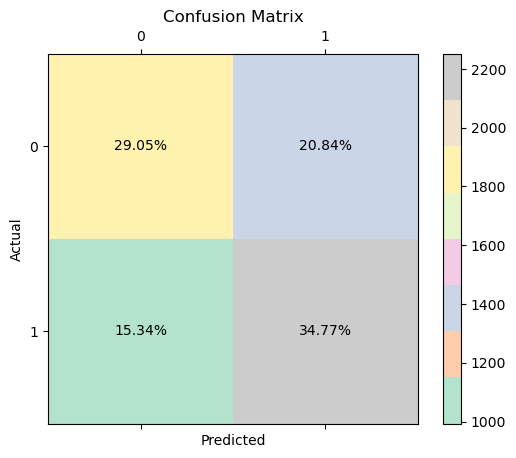

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.58      0.62      3230
           1       0.63      0.69      0.66      3244

    accuracy                           0.64      6474
   macro avg       0.64      0.64      0.64      6474
weighted avg       0.64      0.64      0.64      6474



In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Modifie les valeurs dans scores_raw_text
# Si le score est 0, la classe devient 1; si le score est 1, la classe devient 0
scores_raw_text = np.where(scores_raw_text == 0, 1, 0)

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], scores_raw_text)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel2")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], scores_raw_text)
print("Classification Report:\n", report)


In [75]:
scores_preprocessed_text = sentiment_scores(data, "preprocessed_text")

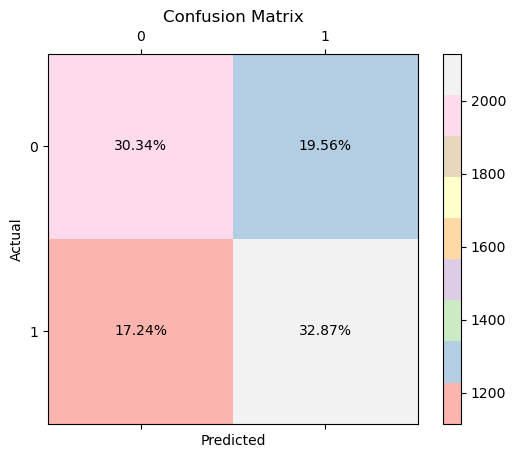

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.61      0.62      3230
           1       0.63      0.66      0.64      3244

    accuracy                           0.63      6474
   macro avg       0.63      0.63      0.63      6474
weighted avg       0.63      0.63      0.63      6474



In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Si le score est 0, la classe devient 1; si le score est 1, la classe devient 0
scores_preprocessed_text = np.where(scores_preprocessed_text == 0, 1, 0)

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], scores_preprocessed_text)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel1")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], scores_preprocessed_text)
print("Classification Report:\n", report)


#### Spacy TextBlob
TextBlob fonctionne avec un dictionnaire où les mots sont enregistrés avec leur connotation positive/négative.

In [77]:
import pandas as pd
from textblob import TextBlob

def analyse_sentiments_textblob(df, column_name):
    # Fonction pour obtenir le score de sentiment
    def get_sentiment_score(text):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        score = round((polarity + 1) / 2)
        return score
    
    # Appliquer la fonction à la colonne spécifiée du DataFrame
    sentiment_score = df[column_name].apply(get_sentiment_score)
    
    return sentiment_score


scores_raw_textblob = analyse_sentiments_textblob(data, 'text')

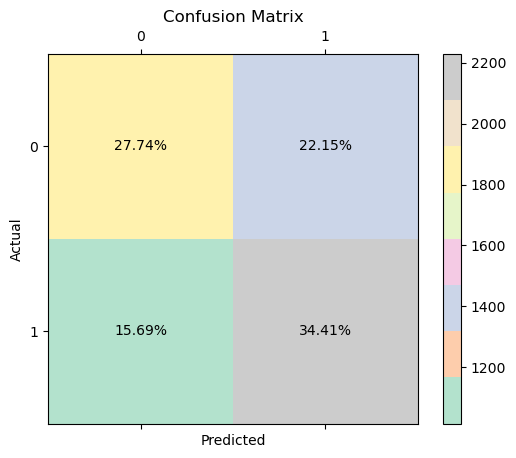

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.56      0.59      3230
           1       0.61      0.69      0.65      3244

    accuracy                           0.62      6474
   macro avg       0.62      0.62      0.62      6474
weighted avg       0.62      0.62      0.62      6474



In [78]:
# Si le score est 0, la classe devient 1; si le score est 1, la classe devient 0
scores_raw_textblob = np.where(scores_raw_textblob == 0, 1, 0)

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], scores_raw_textblob)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel2")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], scores_raw_textblob)
print("Classification Report:\n", report)

<div class="alert alert-block alert-danger">
    <b>Le calcul de NLTK (utilisant VADER, outil spécifiquement élaboré pour l'analyse de tweets) est plus rapide que TextBlob avec un taux de faux négatifs équivalent. On peut bien sûr ajuster le seuil de détection pour les minimiser mais l'exactitude de prédiction restera au même niveau. Considérons plutôt qu'il s'agit d'une baseline. A noter également que VADER n'a pas besoin de l'ensemble des pré-traitements que nous avons effectués ; au contraire ils dégradent légèrement le résultat.</b>
</div>

In [79]:
data["sia_sentiment"] = scores_raw_text

### Préparation des données à la modélisation

Nous allons comparer les performances des modèles sur un échantillon que nous allons séparer en train/test et garder également 25 % des données pour un éventuel test complémentaire.

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Echantillonage
df_sample, test_df = train_test_split(data, test_size=0.25, stratify=data["target"])

In [81]:
df_sample.shape

(4855, 14)

In [82]:
# Séparation en train/test
train_df, val_df = train_test_split(df_sample, test_size=0.3, stratify=df_sample['target'])

print("Taille de l'ensemble d'entraînement :", len(train_df))
print("Taille de l'ensemble de test :", len(test_df))

Taille de l'ensemble d'entraînement : 3398
Taille de l'ensemble de test : 1619


In [83]:
train_df.head(5)

,target,ids,date,flag,user,text,sentiment_score,cleaned_text,tokenized,preprocessed_text,preprocessed_tokenized,length_tokenized,length_preprocessed_tokenized,sia_sentiment
609606,1,2223809797,Thu Jun 18 08:44:16 PDT 2009,NO_QUERY,koa,And apparently this is not the first time a pilot died in flight this year. http://bit.ly/3ZD34Q,0,And apparently this is not the first time a pilot died in flight this year. <url>,"[And, apparently, this, is, not, the, first, time, a, pilot, died, in, flight, this, year, ., <url>]",apparently first time pilot died flight year <url>,"[apparently, first, time, pilot, died, flight, year, <url>]",17,8,1
529242,1,2195387985,Tue Jun 16 11:03:49 PDT 2009,NO_QUERY,choppee,Back from Germany still have a 5 hour layover in new York. Bleh,0,Back from Germany still have a 5-hour layover in New York. Blew,"[Back, from, Germany, still, have, a, 5-hour, layover, in, New, York, ., Blew]",back germany still 5hour layover new york blew,"[back, germany, still, 5hour, layover, new, york, blew]",13,8,1
1212792,0,1989285640,Mon Jun 01 00:59:50 PDT 2009,NO_QUERY,happienoodleboy,"Boarding soon, germany here i come",4,"Boarding soon, Germany here I come","[Boarding, soon, ,, Germany, here, I, come]",boarding soon germany come,"[boarding, soon, germany, come]",7,4,1
878868,0,1685326897,Sat May 02 23:55:25 PDT 2009,NO_QUERY,HeartExMachina,"wootz! May 16th, (saturday) Red Roof Inn, Airport Rd Allentown. yay!",4,"Wootz! May 16th, (Saturday) Red Roof Inn, Airport Rd Allentown. Yay!","[Wootz, !, May, 16th, ,, (, Saturday, ), Red, Roof, Inn, ,, Airport, Rd, Allentown, ., Yay, !]",wootz ! may 16th saturday red roof inn airport rd allentown yay !,"[wootz, !, may, 16th, saturday, red, roof, inn, airport, rd, allentown, yay, !]",18,13,0
1590825,0,2191464412,Tue Jun 16 05:19:55 PDT 2009,NO_QUERY,DaynaRoselli,"@24k I know, I'm so excited for the Iphone upgrade!",4,"<mention> I know, I am so excited about the iPhone upgrade!","[<mention>, I, know, ,, I, am, so, excited, about, the, iPhone, upgrade, !]",<mention> know excited iphone upgrade !,"[<mention>, know, excited, iphone, upgrade, !]",13,6,0


In [84]:
# Sauvegarde des dataframe train et test
train_df.to_csv('./data/train_df.csv', index=True)
test_df.to_csv('./data/test_df.csv', index=True)
val_df.to_csv('./data/val_df.csv', index=True)